# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

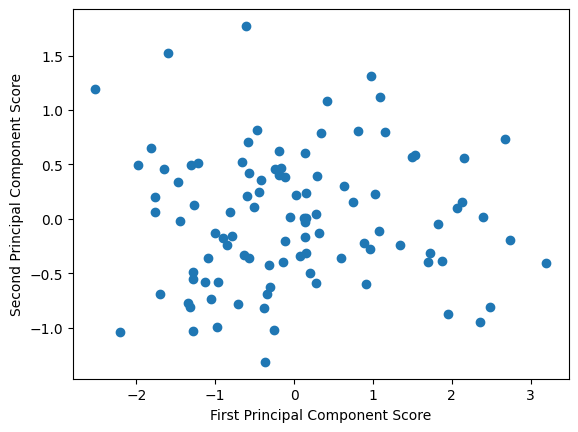

In [16]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

The three upper left corner outliers have a relatively high (negative) first principal component score and a high positive second principal component value as indicated by the axis labels/values. This indicates that their values in series 3 is generally in trend with the rest of the data, given its placement on the x-axis. This is because the principal components capture explained variance, and from the .components attribute, it is noted that the first principal component is firmly dominated by series 3 with a weight of 0.916. While the outliers' left-skewed placement indicates some deviation from the trend, it is not as significant a deviation as in the second principal component, which is likely capturing the high correlation between series 1 and series 2 as indicated by the loadings/weights. Series 2 is just a slightly noisy copy of series 1, and the pairplot below supports this notion as there is a very high correlation between series 1 and series 2, but the significant noise added in series 3 displays a steep dropoff in correlation with the other two series.

It's difficult to say anything about the relative values of series 1 and series 2 because the principal components are new axes which are linear combinations of all three series, meaning they lose direct interpretability compared to the original coordinates. The relative values were combined in an abstract way during the transformation meaning it's hard to gain any information about them just from the fact that their second principal component displayed greater variation. It can only be said that the significant deviation for these points occurred in the dimension that captured the relationship between series 1 and series 2. The advantages of the PCA visualization are that it reduces dimensionality, allowing analysis in two dimensions, and captures nearly 99% of the explained variance in the first two principal components as seen in the variance ratios. The main disadvantage of the visualization is that it's hard to directly interpret the data in terms of the original series due to the transformation. The outliers are interesting to note, as they may indicate extreme values in that dimension with regard to variance, which could be worth investigating further.

In [20]:
import seaborn as sns

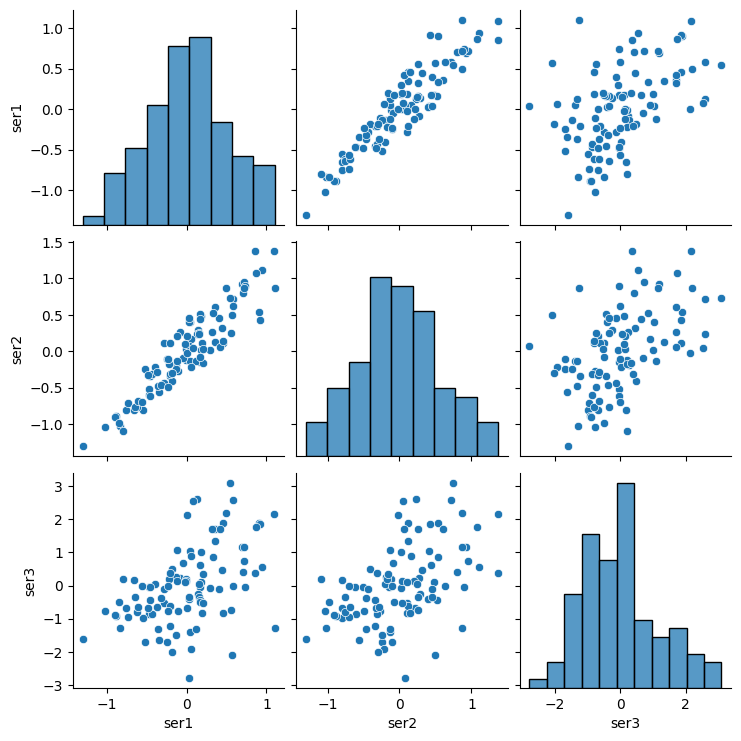

In [21]:
sns.pairplot(df)

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

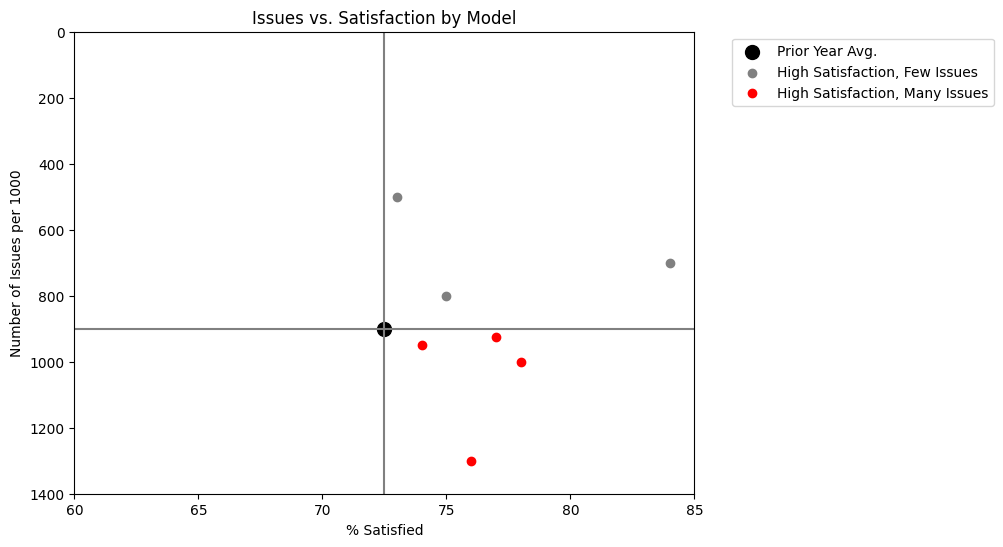

In [15]:
# Figure 5.6, pp. 136

prior_year_x = 72.5
prior_year_y = 900
few_x = (73,75,84)
few_y = (500,800,700)
many_x = (74,76,77,78)
many_y = (950,1300,925,1000)

plt.figure(figsize=(8, 6))
plt.scatter(prior_year_x, prior_year_y, color='black', s = 100, label='Prior Year Avg.')
plt.scatter(few_x, few_y, color='gray', label='High Satisfaction, Few Issues')
plt.scatter(many_x, many_y, color='red', label='High Satisfaction, Many Issues')
plt.axhline(y=900, color='gray', linestyle='-')
plt.axvline(x=72.5, color='gray', linestyle='-')

plt.xlabel("% Satisfied")
plt.ylabel("Number of Issues per 1000")
plt.yticks(np.arange(0, 1600, 200))
plt.xticks(np.arange(60, 90, 5))  

# Invert y-axis so issues go downward
plt.gca().invert_yaxis()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Issues vs. Satisfaction by Model")
plt.show()